In [1]:
import underworld as uw
import math
from underworld import function as fn
import glucifer
import numpy as np
import os
import glucifer

In [2]:

xRes= 64
yRes = 32
dim  = 2
boxLength = 3500.0
boxHeight = 450.0
minX=-2500.0
maxX=1000.0
minY=-400.0
maxY=50.0

#Density

IbMantleDensity = 3.267e-12
ViMantleDensity =  3.267e-12
AfMantleDensity = 3.267e-12 #3300
ViCrustDensity = 2.8313e-12
ViLowCrustDensity =  3.09e-12  #vizcaya oceanic lower crust, 3120 (Carballo)
EuMidCrustDensity = 2.8313e-12   #2860
EuLowCrust1Density = 3.09e-12  #vizcaya oceanic lower crust, 3120 (Carballo)
EuLowCrust2Density = 2.8709e-12 #cantabrian margin, 2900 lower crust en general (quizá deberia usar lo de Mesozoic sediments)
AlbCrustDensity = 2.8709e-12 # alboran margin 2860
IbLowCrustDensity = 2.92e-12  #Lower crust Iberia 2950 (Carballo), 
MidCrustDensity = 2.8313e-12   #Middle crust 2860
UpCrustDensity = 2.7521e-12    #upper crust 2780
basement2Density = 2.6432e-12 #central system 2670
basement0Density= 2.5244e-12  # Mesozoic sediments 2550 (Pereiro)
basement1Density = 2.769e-12 #Cenozoic sediments 2300
IbUpCrustDensity= 2.7224e-12   # 2750 
IbMidCrustDensity= 2.8709e-12   #Middle crust 2860
airDensity = 9.9e-16  
seaDensity = 9.9e-13 
astenosphereDensity=3.2569e-12 #3290
weakzoneDensity = 3.2173e-12 #3250
#Viscosity
airViscosity = 0.1 # 1e19
waterViscosity=0.10 # 1e19
IbCrustViscosity = 1000.0 # 1e23
IbLowCrustViscosity = 10. # 1e21  este es el valor anterior
AlbCrustViscosity = 1000.0
AfCrustViscosity = 10000.0 #1e24
AfLowCrustViscosity = 10000. #1e24
ViCrustViscosity = 1000.0 
ViLowCrustViscosity = 10. 
EuCrustViscosity = 1000.0 
EuLowCrustViscosity= 1000. 
EuMantleViscosity =  50000.0 #5e24
IbMantleViscosity = 5000.0 #5e23
AfMantleViscosity = 80000.0 #8e24
ViMantleViscosity = 5000.0 #5e23  #Cambiar el nombre a Eu
astenosphereViscosity = 10.0 #1e21
sedimentViscosity=  500. #5e22  este es el valor anterior
weakzoneviscosity=70.0 #7e21

#Scaling Factors to SI
#Length in the model correspond to km 
km=1.
g=9.81 
density=1010152544552210.
viscosity=1e20
stress=density*g*1000.
time=10.1015254455
velocity=98.995
pressure=(1/1.01e-19)

In [3]:
#cm / y
1.28e-12*(1000./time)*(100.*365*24*3600)

0.39960380457173594

In [4]:
mesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q1/dQ0"),
                                 elementRes  = (xRes, yRes), 
                                 minCoord    = (minX, minY), 
                                 maxCoord    = (maxX, maxY),
                                 periodic    = [True, False] ) 

velocityField   = uw.mesh.MeshVariable( mesh=mesh,         nodeDofCount=dim )
pressureField   = uw.mesh.MeshVariable( mesh=mesh.subMesh, nodeDofCount=1 )


In [5]:

swarm = uw.swarm.Swarm( mesh=mesh, particleEscape=True )
materialVariable   = swarm.add_variable( dataType="int", count=1 )
swarmLayout = uw.swarm.layouts.GlobalSpaceFillerLayout( swarm=swarm, particlesPerCell=10 )
swarm.populate_using_layout( layout=swarmLayout )



In [6]:
# initialise the 'materialVariable' data to represent two different materials. 
AirIndex          = 0
IbUpperCrustIndex = 1
IbLowerCrustIndex = 2
IbMantleIndex     = 3
AfUpperCrustIndex = 4
AfLowerCrustIndex = 5
AfMantleIndex     = 6
CentralIndex      = 7
CentralPartIndex  = 8
astenosphereIndex = 9
weakIndex         = 10
EuUpperCrustIndex =11
EuLowerCrustIndex =12
EuMantleIndex= 13
# Initial material layout 
astenosphereY   = -110.
airY = 0.0

weakShape        = np.array([(-1016.,0.),(-1000.,0.),(-1025.,-20.),(-1037.5,-30.),(-1137.5,-110.),(-1153.5,-110.)])
weak2Shape       = np.array([(100.,0.),(116.0,0.),(253.5,-110.),(237.5,-110.)])
AfUpCrShape      = np.array([(minX,0.),(-1016.,0.),(-1033.,-20.),(minX,-20.)])
AfLwCrShape      = np.array([(minX,-20.),(-1041.,-20.),(-1053.5,-30.),(minX,-30.)])
EuUpCrShape     = np.array ([(116.0,0.),(maxX,0.0),(maxX,-20.),(141.,-20.)])
EuLowCrShape    = np.array ([(141.,-20.),(maxX,-20.),(maxX,-30.),(153.5,-30.)])
CentralSystShape = np.array([(-500.0,0.0),(-300.0,0.0),(-400.0,-10.)])
CentralPartShape = np.array([(-550.0,0.),(-500.,0.),(-400.,-10.),(-300.,0.),(-250.,0.),(-250.,-20.),(-550.,-20.)])
IbUpNorthCrShape      = np.array([(-1000.,0.),(-550.,0.),(-550.,-20.),(-1025.,-20.)])
IbUpSouthCrShape      = np.array([(-250.0,0.),(100.,0.),(125.,-20.),(-250.,-20.)])

IbLwCr1Shape      = np.array([(-1025.,-20.),(125.,-20.),(137.5,-30.),(-1037.5,-30.)])

IbMantleShape    = np.array([(-1037.5,-30.),(137.5,-30.),(237.5,-110.),(-1137.5,-110.)])
AfMantleShape    = np.array([(minX+40.,-30.), (-1045.5,-30.),(-1145.5,-110.),(minX+40.,-110.0)])
EuMantleShape    = np.array([(153.5,-30.),(maxX,-30.),(maxX,-110.),(253.5,-110.)])
                          
########

AfUpCr           = fn.shape.Polygon( AfUpCrShape )
AfLwCr           = fn.shape.Polygon( AfLwCrShape ) 
CentralSyst      = fn.shape.Polygon( CentralSystShape )
IbUpNorthCr           = fn.shape.Polygon( IbUpNorthCrShape )
IbUpSouthCr           = fn.shape.Polygon( IbUpSouthCrShape )
IbUpCentralCr    = fn.shape.Polygon(CentralPartShape)
IbLwCr           = fn.shape.Polygon( IbLwCr1Shape )
Ibmantle         = fn.shape.Polygon(IbMantleShape)
Afmantle         = fn.shape.Polygon(AfMantleShape)
weak1             = fn.shape.Polygon(weakShape)
weak2            = fn.shape.Polygon(weak2Shape)
EuUpCr           =fn.shape.Polygon(EuUpCrShape)
EuLwCr           =fn.shape.Polygon(EuLowCrShape)
Eumantle         =fn.shape.Polygon(EuMantleShape)

# initialise everying to be upper mantle material
materialVariable.data[:] = astenosphereIndex

# change matieral index if the particle is in the lower mantle or slab shape
for index in range( len(swarm.particleCoordinates.data) ):
    coord = swarm.particleCoordinates.data[index][:]
    if coord[1] > airY:
        materialVariable.data[index]     = AirIndex   
    if  IbUpNorthCr.evaluate(tuple(coord)):
          materialVariable.data[index]   = IbUpperCrustIndex 
    if  IbUpSouthCr.evaluate(tuple(coord)):
          materialVariable.data[index]   = IbUpperCrustIndex     
    if  IbUpCentralCr.evaluate(tuple(coord)):
          materialVariable.data[index]   = CentralPartIndex     
    if AfUpCr.evaluate(tuple(coord)):
            materialVariable.data[index] = AfUpperCrustIndex 
    if AfLwCr.evaluate(tuple(coord)):
            materialVariable.data[index] = AfLowerCrustIndex
    if Eumantle .evaluate(tuple(coord)):
            materialVariable.data[index] = EuMantleIndex
    if IbLwCr.evaluate(tuple(coord)):
            materialVariable.data[index] = IbLowerCrustIndex      
    if Ibmantle.evaluate(tuple(coord)):
            materialVariable.data[index] = IbMantleIndex
    if Afmantle.evaluate(tuple(coord)):
            materialVariable.data[index] = AfMantleIndex
    if EuUpCr.evaluate(tuple(coord)):
            materialVariable.data[index] = EuUpperCrustIndex
    if EuLwCr.evaluate(tuple(coord)):
            materialVariable.data[index] = EuLowerCrustIndex
    if CentralSyst.evaluate(tuple(coord)):
            materialVariable.data[index] = CentralIndex
    if weak1.evaluate(tuple(coord)):
            materialVariable.data[index] = weakIndex
    elif weak2.evaluate(tuple(coord)):
        materialVariable.data[index] = weakIndex

In [7]:
# The yeilding of the upper slab is dependent on the strain rate.
strainRateFn = fn.tensor.symmetric( velocityField.fn_gradient )
strainRate_2ndInvariant = fn.tensor.second_invariant( fn.tensor.symmetric( velocityField.fn_gradient ))
cohesion = 3.03046e-12 # corresponds to 30.215MPa  


VonMises = cohesion / 2.*(strainRate_2ndInvariant+1.0e-18)

# friction_angle:

alpha=3.03046e-14   # corresponds to 0.3 MPa/km ---> Ivone paper   

# The upper slab viscosity is the minimum of the 'slabViscosity' or the 'vonMises' 

    
# The upper slab viscosity is the minimum of the 'slabViscosity' or the 'vonMises' 
IbUpCrYieldvisc   = fn.exception.SafeMaths( fn.misc.min(VonMises, IbCrustViscosity) )
IbLwCrYieldvisc = fn.exception.SafeMaths( fn.misc.min(VonMises, IbLowCrustViscosity) )
CentralPartYield= fn.exception.SafeMaths(fn.misc.min(VonMises,IbCrustViscosity))
AfUpCrYieldvisc   = fn.exception.SafeMaths( fn.misc.min(VonMises, AfCrustViscosity) )
AfLwCrYieldvisc  = fn.exception.SafeMaths( fn.misc.min(VonMises, AfLowCrustViscosity) )
AlbLwCrYieldvisc  = fn.exception.SafeMaths( fn.misc.min(VonMises, AlbCrustViscosity) )
IbMantleYieldvisc = fn.exception.SafeMaths( fn.misc.min(VonMises, IbMantleViscosity) )
AfMantleYieldvisc = fn.exception.SafeMaths( fn.misc.min(VonMises, AfMantleViscosity) )
SedimentYieldvisc = fn.exception.SafeMaths( fn.misc.min(VonMises, sedimentViscosity) )
CentralYieldvisc  = fn.exception.SafeMaths( fn.misc.min(VonMises,sedimentViscosity))
EuUpCrYieldvisc    = fn.exception.SafeMaths(fn.misc.min(VonMises,EuCrustViscosity))
EuLowrCrYieldvisc =  fn.exception.SafeMaths (fn.misc.min(VonMises,EuLowCrustViscosity))
# Viscosity function for the materials 
viscosityMap = { 
                 IbMantleIndex       : IbMantleYieldvisc,
                 AfMantleIndex       : AfMantleYieldvisc,
                 EuMantleIndex       : EuMantleViscosity,
                 astenosphereIndex   : astenosphereViscosity,
                 AfUpperCrustIndex   : AfCrustViscosity,
                 AfLowerCrustIndex   : AfLowCrustViscosity,
                 CentralPartIndex    : CentralPartYield,
                 IbUpperCrustIndex   : IbUpCrYieldvisc,
                 IbLowerCrustIndex     : IbLwCrYieldvisc,
                 EuUpperCrustIndex   : AfCrustViscosity,
                 EuLowerCrustIndex   : AfLowCrustViscosity,
                 AirIndex            : airViscosity,
                 CentralIndex        : CentralYieldvisc,
                 weakIndex           : weakzoneviscosity,
                 }


viscosityMapFn = fn.branching.map( fn_key = materialVariable, mapping = viscosityMap )

In [8]:
VonMises.evaluate(mesh).mean(), AfCrustViscosity, cohesion

(1.5152300000000001e-30, 10000.0, 3.03046e-12)

In [9]:
from scipy.spatial import cKDTree as kdTree

def nn_evaluation(fromSwarm, toSwarm, n=1, weighted=False):
    """
    This function provides nearest neighbour information for uw swarms, 
    given the "toSwarm", this function returns the indices of the n nearest neighbours in "fromSwarm"
    it also returns the inverse-distance if weighted=True. 
    
    The function works in parallel.
    
    The arrays come out a bit differently when used in nearest neighbour form
    (n = 1), or IDW: (n > 1). The examples belowe show how to fill out a swarm variable in each case. 
    
    
    Usage n == 1:
    ------------
    ix, weights = nn_evaluation(swarm, fault.swarm, n=1, weighted=False)
    toSwarmVar.data[:][:,0] = np.average(fromSwarmVar[ix][:,0], weights=weights)
    
    Usage n > 1:
    ------------
    ix, weights = nn_evaluation(swarm, fault.swarm, n=2, weighted=False)
    toSwarmVar.data[:][:,0] =  np.average(fromSwarmVar[ix][:,:,0], weights=weights, axis=1)
    
    """
    
    
    if len(toSwarm) > 0: #this is required for safety in parallel
        
        #this should avoid building the tree again when this function is called multiple times.
        try:
            tree = fromSwarm.tree
            #print(1)
        except:
            #print(2)
            fromSwarm.tree = kdTree(fromSwarm.particleCoordinates.data)
            tree = fromSwarm.tree
        d, ix = tree.query(toSwarm, n)
        if n == 1:
            weights = np.ones(toSwarm.shape[0])
        elif not weighted:
            weights = np.ones((toSwarm.shape[0], n))*(1./n)
        else:
            weights = (1./d[:])/(1./d[:]).sum(axis=1)[:,None]
        return ix,  weights 
    else:
        return [], []

In [10]:
densityMap = {  
                IbMantleIndex      : IbMantleDensity,
                AfMantleIndex      : AfMantleDensity,
                EuMantleIndex      : AfMantleDensity,
                astenosphereIndex  : weakzoneDensity,
                IbUpperCrustIndex  : IbUpCrustDensity,
                IbLowerCrustIndex  : IbLowCrustDensity,
                AfUpperCrustIndex  : UpCrustDensity,
                AfLowerCrustIndex  : EuLowCrust2Density,
                EuUpperCrustIndex  : EuMidCrustDensity,
                EuLowerCrustIndex  : EuMidCrustDensity,
                CentralIndex       : basement2Density,
                CentralPartIndex   : IbUpCrustDensity,
                AirIndex           : airDensity,
                weakIndex          : basement2Density,
               
               }
densityFn = fn.branching.map( fn_key = materialVariable, mapping = densityMap )

# Define our vertical unit vector using a python tuple
z_hat = ( 0.0, 1.0 )

# now create a buoyancy force vector
buoyancyFn = -1.0 * densityFn * z_hat

In [11]:

# set initial conditions (and boundary values)
velocityField.data[:] = [0.,0.]
pressureField.data[:] = 0.



In [12]:
# send boundary condition information to underworld
iWalls = mesh.specialSets["MinI_VertexSet"] + mesh.specialSets["MaxI_VertexSet"]
jWalls = mesh.specialSets["MinJ_VertexSet"] + mesh.specialSets["MaxJ_VertexSet"]
bottomWall = mesh.specialSets["MinJ_VertexSet"]
top    = mesh.specialSets["MaxJ_VertexSet"]
allWalls = iWalls+jWalls



# In[36]:


indentorSet = []   #empty set
for index, coord in enumerate(mesh.data):
    if coord[0] < -1600.0 and coord[0] > -1700.0 and coord[1]<=0. and coord[1]>-110.:
        velocityField.data[index] = (1.28e-12, 0.) 
        indentorSet.append(index)   #build "imposed" set    
    if  coord[0]< maxX and coord[0]> maxX-20.  and coord[1] <= 0. and coord[1]>= -200.:
        velocityField.data[index] = (0., 0.) #
        indentorSet.append(index)   #build "imposed" set
    if  coord[0]>= minX and coord[0]< minX+20.  and coord[1] <= 0. and coord[1]>= -200.:
        velocityField.data[index] = (0., 0.) #
        indentorSet.append(index)   #build "imposed" set
# create FeMesh_IndexSet structure required for the imposing dirichlet conditions
indentorMeshSet = uw.mesh.FeMesh_IndexSet(mesh, topologicalIndex=0, size=mesh.nodesGlobal, fromObject=indentorSet )

#topologicalIndex= 0: vertex   1: edge   2:face   3:volume

# add the mesh index set to the original dirichlet conditions in ln[17]
newVC = uw.conditions.DirichletCondition( variable = velocityField, indexSetsPerDof =(bottomWall+indentorMeshSet,jWalls+indentorMeshSet))

In [13]:
surfaceArea = uw.utils.Integral(fn=1.0,mesh=mesh, integrationType='surface', surfaceIndexSet=top)
surfacePressureIntegral = uw.utils.Integral(fn=pressureField, mesh=mesh, integrationType='surface', surfaceIndexSet=top)

(area,) = surfaceArea.evaluate()
(p0,) = surfacePressureIntegral.evaluate() 

pressureField.data[:] -= p0 / area

In [14]:
# Initial linear slab viscosity setup
stokesPIC1 = uw.systems.Stokes( velocityField = velocityField, 
                               pressureField = pressureField,
                               voronoi_swarm = swarm, 
                               conditions    = [newVC,],
                               #fn_viscosity   = viscosityMapFn,
                               fn_viscosity   = 1000.,                              
                               fn_bodyforce   = buoyancyFn )
# Create solver & solve

solver = uw.systems.Solver(stokesPIC1)

solver.solve()

In [15]:
# Initial linear slab viscosity setup
stokesPIC = uw.systems.Stokes( velocityField = velocityField, 
                               pressureField = pressureField,
                               voronoi_swarm = swarm, 
                               conditions    = [newVC,],
                               #fn_viscosity   = viscosityMapFn,
                               fn_viscosity   = CentralPartYield,                              
                               fn_bodyforce   = buoyancyFn )
# Create solver & solve
solver = uw.systems.Solver(stokesPIC)


# use "lu" direct solve if running in serial
if(uw.nProcs()==1):
    solver.set_inner_method("lu")



In [16]:

advector = uw.systems.SwarmAdvector( swarm=swarm, velocityField=velocityField, order=2 )


In [17]:
solver.solve(nonLinearIterate=True, nonLinearTolerance=0.01)

In [27]:
stressInv = 2.*strainRate_2ndInvariant*CentralPartYield

In [28]:
normStressFn = (stressInv - cohesion)/cohesion
l2Err = fn.math.sqrt(fn.math.dot(normStressFn, normStressFn))
uw.utils.Integral( l2Err, mesh ).evaluate()[0]/uw.utils.Integral( 1., mesh ).evaluate()[0]

1.0


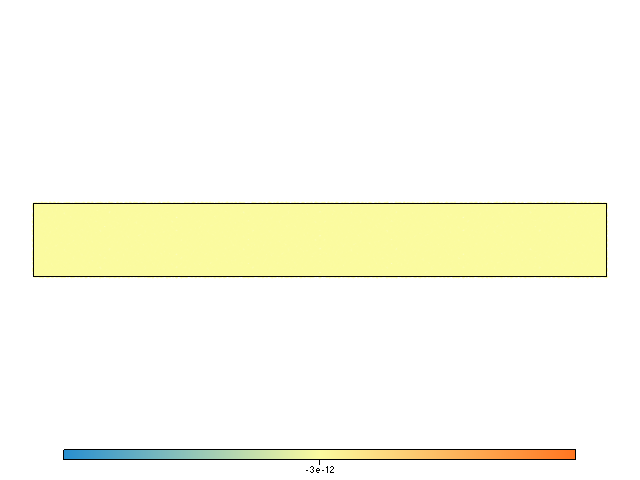

In [36]:
figDb = glucifer.Figure()
figDb.append( glucifer.objects.Points(swarm, stressInv > cohesion, pointSize=4))
#figDb.append( glucifer.objects.Points(swarm, strainRate_2ndInvariant, pointSize=4))
#figDb.append( glucifer.objects.Points(swarm, materialVariable, pointSize=4))


figDb.show()

In [21]:
#strainRate_2ndInvariant.evaluate(mesh).mean()

In [22]:
#VonMises = cohesion / (strainRate_2ndInvariant.evaluate(mesh).mean())
#VonMises

error is worse with full viscosityFn